# Classification

(reference Chapter 4 ISLR)

In [4]:
#basic imports

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
sns.set_style('white')
# plt.style.use('seaborn-white')

We first load in the Student Default database. See the documentation here: https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Default


In [5]:
# Install the openpyxl package
%pip install openpyxl

In [6]:
df = pd.read_excel('./Data/Default.xlsx')
df.head(20)

/Users/ijosh/Documents/GitHub/data-science/.venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


In [9]:
#recode the categorical values in default and student columsn to numerals
#by adding the 'default2' and 'student2' columns
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(15)
#verify that No is coded as 0 and Yes = 1

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0
5,6,No,Yes,919.588530,7491.558572,0,1
6,7,No,No,825.513331,24905.226578,0,0
7,8,No,Yes,808.667504,17600.451344,0,1
8,9,No,No,1161.057854,37468.529288,0,0
9,10,No,No,0.000000,29275.268293,0,0


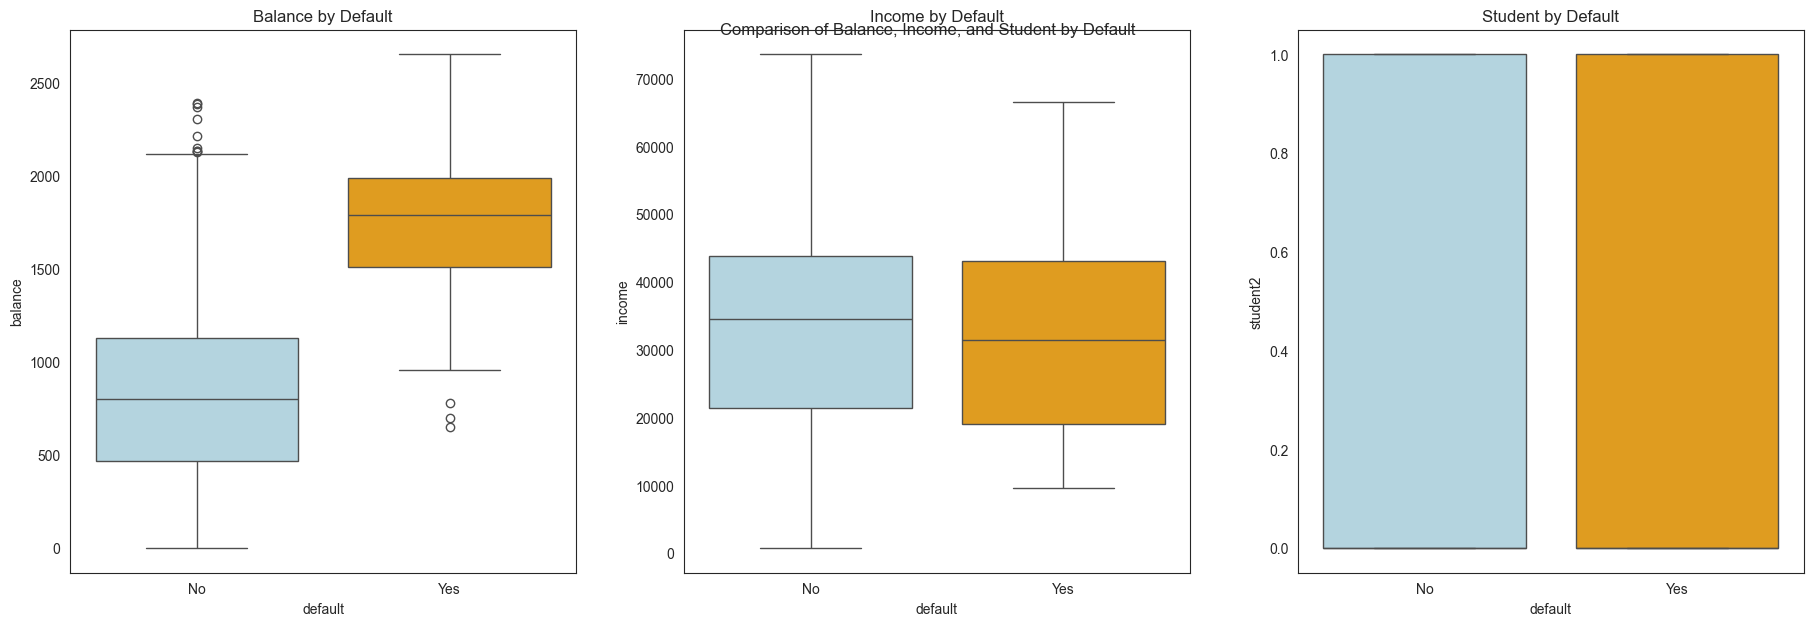

In [11]:
c_palette = {'No':'lightblue', 'Yes':'orange'}

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1, w_pad=5, h_pad=1.0)

# Plot the boxplots
sns.boxplot(x='default', y='balance', hue='default', data=df, orient='v', ax=ax1, palette=c_palette, legend=False)
sns.boxplot(x='default', y='income', hue='default', data=df, orient='v', ax=ax2, palette=c_palette, legend=False)
sns.boxplot(x='default', y='student2', hue='default', data=df, orient='v', ax=ax3, palette=c_palette, legend=False)

# Set titles for each subplot
ax1.set_title('Balance by Default')
ax2.set_title('Income by Default')
ax3.set_title('Student by Default')

# Set the main title and center it
plt.suptitle('Comparison of Balance, Income, and Student by Default', x=0.5, ha='center')

# Show the plot
plt.show()

# Logistic Regression (Scikit-Learn)

In [12]:
X_train = df.balance.values.reshape(-1,1)

# Print the head of the X_train
print(X_train[0:5])

print("\nComment: \nThe values in the balance column have been reshaped to a 2D array.\nSince, LogisticRegression() expects a 2D array as input.")

[[ 729.52649521]
 [ 817.18040656]
 [1073.54916401]
 [ 529.25060475]
 [ 785.65588293]]

Comment: 
The values in the balance column have been reshaped to a 2D array.
Since, LogisticRegression() expects a 2D array as input.


In [13]:
y = df.default2 #target variable (Converted values from Yes or No to be 1 or 0)

# Print the head of the y_train
print(y[0:5])

0    0
1    0
2    0
3    0
4    0
Name: default2, dtype: int64


In [14]:
# The logistic regression model
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y)

print(clf)
print('\nclasses: ', clf.classes_)
print('Comment: This shows the unique classes in the target variable y.')
print('[0 1]: Indicates that the target variable has two classes: 0 (No) and 1 (Yes). These are the binary outcomes that the logistic regression model is predicting.')

print('\ncoefficients: ', clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')

classes:  [0 1]
Comment: This shows the unique classes in the target variable y.
[0 1]: Indicates that the target variable has two classes: 0 (No) and 1 (Yes). These are the binary outcomes that the logistic regression model is predicting.

coefficients:  [[0.00542374]]
intercept : [-10.52598837]


# Logistic Regression (Statsmodel)

In [146]:
X_train = sm.add_constant(df.balance)
X_train.head()

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883


In [21]:
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145834
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.094149,0.146257,-21.155566,2.452272e-99,-3.380808,-2.807491e+00
income,-0.000008,0.000004,-1.985227,4.711917e-02,-0.000017,-1.062925e-07


### Question 

1. Explain the values obtained especially in relation to the Z and p values

### Answer
1. Relation between `X = balance` and `Y = default`
   - **Intercept**: The intercept term is highly significant, with a negative coefficient indicating low log-odds of defaulting when balance is 0.
   - **Balance**: The balance feature is highly significant, with a positive coefficient indicating that higher balances are associated with higher log-odds of defaulting.
   - **Z-values and P-values**: Both the intercept and balance coefficients have very high z-values and extremely small p-values, indicating strong evidence against the null hypothesis that the coefficients are zero.
   - **Confidence Intervals**: The 95% confidence intervals for both coefficients do not include zero, further confirming their significance.

   **Conclusion**:
   - **Impact of Balance on Default**: The balance significantly impacts the default status. Higher balances are associated with higher log-odds of defaulting.
   - **Null Hypothesis**: The null hypothesis that the balance coefficient is zero is strongly rejected based on the very high z-value, extremely small p-value, and confidence intervals that do not include zero.


2. Rerun the regression with student2 column. Also explain the results in relation to Z and p.

In [16]:
X_train = df.student2.values.reshape(-1,1)

clf_student = skl_lm.LogisticRegression(solver='newton-cg')

clf_student.fit(X_train, y)
print(clf_student)
print('\nclasses: ', clf_student.classes_)
print('coefficients: ', clf_student.coef_)
print('intercept :', clf_student.intercept_)

LogisticRegression(solver='newton-cg')

classes:  [0 1]
coefficients:  [[0.39880286]]
intercept : [-3.50133017]


In [17]:
X_train = sm.add_constant(df.student2)
est2 = sm.Logit(y, X_train).fit()

est2.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


### Answer
The high z-value and very small p-value for the student coefficient provide strong evidence against the null hypothesis, indicating that being a student significantly impacts the log-odds of defaulting.

# Multiple Logistic Regression (Statsmodel)

In [18]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])

est3 = sm.Logit(y, X_train).fit()
est3.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [19]:
X_train = df.income.values.reshape(-1,1)

clf_balance_student = skl_lm.LogisticRegression(solver='newton-cg')

clf_balance_student.fit(X_train, y)
print(clf_balance_student)
print('\nclasses: ', clf_balance_student.classes_)
print('coefficients: ', clf_balance_student.coef_)
print('intercept :', clf_balance_student.intercept_)

LogisticRegression(solver='newton-cg')

classes:  [0 1]
coefficients:  [[-8.66293255e-06]]
intercept : [-3.08248665]


/Users/ijosh/Documents/GitHub/data-science/.venv/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/ijosh/Documents/GitHub/data-science/.venv/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


In [20]:
X_train = sm.add_constant(df.income)
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145834
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.094149,0.146257,-21.155566,2.452272e-99,-3.380808,-2.807491e+00
income,-0.000008,0.000004,-1.985227,4.711917e-02,-0.000017,-1.062925e-07


### Question 
1. Explain the values obtained especially in relation to the Z and p values above. Also compare the values obtained by single regression of students with the multiple regression.
    
    **Answer**:
    - **Multiple Regression** :

        The very high z-values and extremely small p-values for the balance coefficient in the multiple regression model provide strong evidence against the null hypothesis, indicating that balance significantly impacts the log-odds of defaulting. The high p-value for the income coefficient in the multiple regression model suggests that income does not significantly impact the log-odds of defaulting when accounting for balance and student status. The significant p-values for the student2 coefficient in both models indicate that being a student significantly impacts the log-odds of defaulting.

    - **Comparison of Single and Multiple Regression**:

      1. **Balance**:
         - **Multiple Regression**: The balance coefficient is 0.005737 with a z-value of 24.736506 and a p-value of 4.331521e-135, indicating a significant positive impact on the log-odds of defaulting. Balance is not included in the single regressions provided.

      2. **Income**:
         - **Single Regression**: The income coefficient is -0.000008 with a z-value of -1.985227 and a p-value of 4.711917e-02, indicating a significant negative impact on the log-odds of defaulting.
         - **Multiple Regression**: The income coefficient is 0.000003 with a z-value of 0.369808 and a p-value of 7.115254e-01, indicating that income does not have a significant impact on the log-odds of defaulting when accounting for balance and student status.

      3. **Student2**:
         - **Single Regression**: The student2 coefficient is 0.404887 with a z-value of 3.520177 and a p-value of 0.000431, indicating a significant positive impact on the log-odds of defaulting.
         - **Multiple Regression**: The student2 coefficient is -0.646776 with a z-value of -2.737595 and a p-value of 6.189022e-03, indicating a significant negative impact on the log-odds of defaulting when accounting for balance and income.

      4. **Intercept**:
         - **Single Regression (income)**: The intercept is -3.094149 with a z-value of -21.155566 and a p-value of 2.452272e-99, indicating a significant negative impact on the log-odds of defaulting when income is 0.
         - **Single Regression (student2)**: The intercept is -3.504128 with a z-value of -49.554094 and a p-value of 0.000000, indicating a significant negative impact on the log-odds of defaulting when student status is 0.
         - **Multiple Regression**: The intercept is -10.869045 with a z-value of -22.079320 and a p-value of 4.995499e-108, indicating a significant negative impact on the log-odds of defaulting when balance, income, and student status are 0.

      - **Conclusion**:

        - **Balance**: The balance significantly impacts the log-odds of defaulting in the multiple regression model.
        - **Income**: Income has a significant negative impact on the log-odds of defaulting in the single regression model but does not significantly impact the log-odds of defaulting in the multiple regression model.
        - **Student2**: The student2 coefficient is significant in both single and multiple regression models, but the direction of the impact changes when accounting for balance and income in the multiple regression model.
        - **Intercept**: The intercept is significant in all models, indicating a baseline log-odds of defaulting when the predictors are zero.

### Linear Discriminant Analysis


In [22]:
#using scikit-learn
X = df[['balance', 'income', 'student2']].to_numpy()
y = df.default2.to_numpy()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [23]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### Question 
The above code uses the entire dataset to perform the fit function (Note: the fit function is where the parameters are learnt). For proper testing and evaluation the training and test data should be separated. Edit the code above so that only training data are used for fit() and predict() uses test data that was not used in training. Print the results out as in the sample above.

1. Comment on the results obtained, i.e. the difference in the results and the reasons for it

### Answer

- **Difference in Results**:

  - The model performs very well in predicting the "No" class with high precision (0.97) and recall (1.00).
  - The model performs poorly in predicting the "Yes" class with lower precision (0.78) and very low recall (0.24).

- **Reasons for the Difference**:

  - Class Imbalance: The dataset is highly imbalanced, with a large number of "No" instances (9667) compared to "Yes" instances (333). This imbalance leads to the model being biased towards predicting the majority class ("No").
  - Training and Testing Split: By separating the training and testing data, the model is evaluated on data it has not seen before, providing a more realistic assessment of its performance. The high accuracy (0.97) is primarily due to the model's ability to correctly predict the majority class.
  - Recall for "Yes" Class: The low recall for the "Yes" class (0.24) indicates that the model misses many actual "Yes" instances, which is a common issue in imbalanced datasets.
- **Summary**:
  - The model shows high accuracy and performs well in predicting the majority class ("No").
  - The model struggles to predict the minority class ("Yes"), resulting in lower precision and recall for this class.
  - The class imbalance in the dataset significantly impacts the model's performance, highlighting the need for techniques to handle imbalanced data, such as resampling or using different evaluation metrics.



### Quadratic Discriminant Analysis

QDA can be performed with code sample as below:
```
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
```

KNN can be performed with code sample as below:
```
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
```
The output from both can be printed:
```
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))
```

### Question 
Split the dataset into train and test as earlier. Run the QDA and KNN.
1. Compare and comments on the results between LDA,QDA and KNN. 
1. How do we select what K is for KNN? Which K value is best? 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [28]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[4829  107]
 [  17   47]]
              precision    recall  f1-score   support

           0      0.978     0.996     0.987      4846
           1      0.734     0.305     0.431       154

    accuracy                          0.975      5000
   macro avg      0.856     0.651     0.709      5000
weighted avg      0.971     0.975     0.970      5000



In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[4722  111]
 [ 124   43]]
              precision    recall  f1-score   support

           0      0.977     0.974     0.976      4846
           1      0.257     0.279     0.268       154

    accuracy                          0.953      5000
   macro avg      0.617     0.627     0.622      5000
weighted avg      0.955     0.953     0.954      5000



### Answer

1. Comparison and Comments:
   1. LDA:
        - Accuracy: 0.97
        - Precision (No): 0.97
        - Recall (No): 1.00
        - Precision (Yes): 0.78
        - Recall (Yes): 0.24
        - Comment: LDA performs very well in predicting the "No" class with high precision and recall. However, it struggles with the "Yes" class, resulting in lower recall.
    2. QDA:
        - Accuracy: 0.975
        - Precision (No): 0.978
        - Recall (No): 0.996
        - Precision (Yes): 0.734
        - Recall (Yes): 0.305
        - Comment: QDA also performs well in predicting the "No" class with high precision and recall. It performs better than LDA in predicting the "Yes" class, with higher precision and recall.
    3. KNN:
        - Accuracy: 0.953
        - Precision (No): 0.977
        - Recall (No): 0.974
        - Precision (Yes): 0.257
        - Recall (Yes): 0.279
        - Comment: KNN performs well in predicting the "No" class but struggles significantly with the "Yes" class, resulting in low precision and recall. This indicates that KNN may not be the best choice for this imbalanced dataset.
2. Selecting K for KNN:
    1. Cross-Validation:
        Use cross-validation to evaluate the performance of different K values. Split the training data into multiple folds and evaluate the model's performance on each fold. Choose the K value that results in the best average performance across all folds.
    2. Grid Search:
        Perform a grid search over a range of K values to find the optimal K. This involves training and evaluating the model for each K value and selecting the one that yields the best performance metrics (e.g., accuracy, precision, recall, F1-score).
    3. Elbow Method:
        Plot the error rate or accuracy against different K values. Look for an "elbow" point where the error rate starts to decrease more slowly or the accuracy starts to plateau. This point often indicates a good choice for K.

    **Best K Value**:
    The best K value is the one that balances bias and variance, providing the best generalization performance on unseen data. It is typically determined through cross-validation or grid search.